## Movie Recommendation System
#### Content Based System : It recommends movies that are similar to the subject.

In [73]:
# import packages
import numpy as np
import pandas as pd
import warnings

In [74]:
# disable warnings
warnings.filterwarnings('ignore')

### Get the dataset


In [75]:
mainDF = pd.read_csv('./assets/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [76]:
mainDF.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [77]:
# get the number of user and movies
print(mainDF.user_id.nunique())
print(mainDF.item_id.nunique())

943
1682


In [78]:
# Read the movie list file and get the movie names
movieTitles = pd.read_csv('./assets/u.item', sep='\\|', header=None, encoding="ISO-8859-1")

# Extract the first 2 cols 
movieTitles = movieTitles[[0, 1]]
movieTitles.columns = ['item_id', 'title']
movieTitles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [79]:
# perform the join operation bw the 2 tables
newDF = pd.merge(mainDF, movieTitles, on='item_id')
newDF.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


### Exploratory Data Analysis

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [81]:
# make 2 dataframes that store the count of ratings (number of people that have rated the movie) and the average rating of that movie
ratings = pd.DataFrame(newDF.groupby('title')['rating'].mean())
ratings["number of ratings"] = pd.DataFrame(newDF.groupby('title')['rating'].count())

In [82]:
ratings

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [83]:
# on sorting the table by the average rating, we get the movies with the highest average rating :: It is clearly evident that the top rated movies are rated by just few people.
ratings.sort_values('rating', ascending=False)

# Thus we need to normailize the data

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


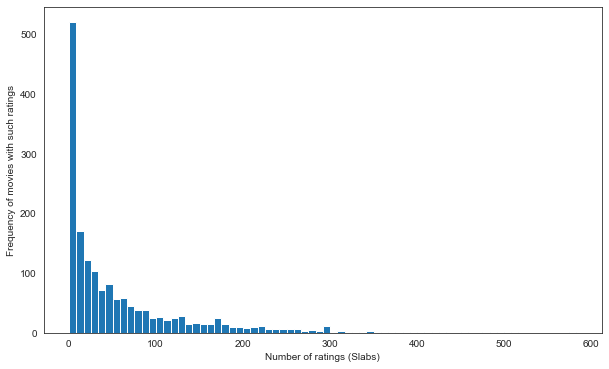

In [84]:
# Histogram of number of ratings

# examine the data/table using a histogram to see the distribution of the ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings['number of ratings'], bins=70)
plt.xlabel('Number of ratings (Slabs)')
plt.ylabel('Frequency of movies with such ratings')
plt.show()

# we can see that the ratings are not uniformly distributed, and there are many movies/the frequency of movies is high, where the number of ratings are relatively low.  
# In conclusion the movies to the left of the graph arent very important to us, the ones with less number of ratings.

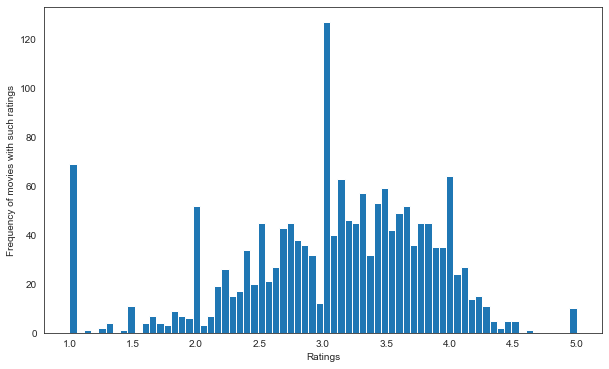

In [85]:
# Historgram of ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=70)
plt.xlabel('Ratings')
plt.ylabel('Frequency of movies with such ratings')
plt.show()

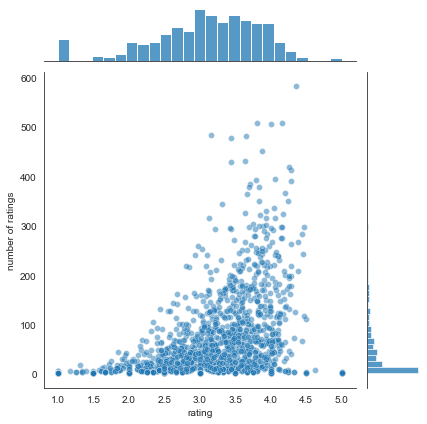

In [86]:
# make a join plot
sns.jointplot(x='rating', y='number of ratings', data=ratings, alpha=0.5)
plt.show()

### Cretaing Movie Recommendation

In [87]:
newDF

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [88]:
# Make a movie matrix
movieMatrix = newDF.pivot_table(index = 'user_id', columns='title', values='rating')
movieMatrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Predict Function


In [158]:
# function that predicts the movie recommendations for the user by using the correlation matrix
def predictMovies(movie_name):
    movie_name_user_ratings = movieMatrix[movie_name]   # for all the users get a movies ratings

    # find the similar movies using correlation 
    similar_movies = movieMatrix.corrwith(movie_name_user_ratings)
    # convert it into DF
    correlated_with_movie_name = pd.DataFrame(similar_movies, columns=['Correlation'])

    # since all users wouldn't have rated the movie, remove the NaN values
    correlated_with_movie_name.dropna(inplace=True)
    
    # join the formed table with the ratings table to get the number of ratings of each movie
    correlated_with_movie_name = correlated_with_movie_name.join(ratings['number of ratings'])
    
    # normailize the data, by removing those movies with number of ratings less than 100
    predictions = correlated_with_movie_name[correlated_with_movie_name['number of ratings'] >= 100].sort_values('Correlation', ascending=False)
    
    # display the top 10 recommended movies
    return predictions
    

In [183]:
titles = pd.DataFrame(newDF['title'].unique())
titles.columns = ["title"]
# call the function predictMovies for random movies
results = {}
for i in range(3):
    mov_name = titles.sample().iloc[0]['title']
    pred = predictMovies(mov_name).head(5)
    results.update({mov_name: pred})

for key, value in results.items():
    print(f"The predictions for movie - {key} are:")
    print(value)
    print("\n\n")


The predictions for movie - I Like It Like That (1994) are:
                                   Correlation  number of ratings
title                                                            
Alien (1979)                               1.0                291
Shining, The (1980)                        1.0                206
Die Hard: With a Vengeance (1995)          1.0                151
Dead Poets Society (1989)                  1.0                251
Conan the Barbarian (1981)                 1.0                107



The predictions for movie - Live Nude Girls (1995) are:
                       Correlation  number of ratings
title                                                
Ice Storm, The (1997)          1.0                108
Boogie Nights (1997)           1.0                189
Edge, The (1997)               1.0                113
Private Parts (1997)           1.0                100
Spawn (1997)                   1.0                143



The predictions for movie - Clockers (